In [2]:
using LinearAlgebra
using Distributions
using LaTeXStrings
using Printf
using FileIO
import JLD2

In [3]:
using DataFrames


In [4]:
using Revise
using Newtrinos
using Newtrinos.osc

In [4]:
using Pkg
Pkg.status() 

Status `~/.julia/environments/myenv/Project.toml`
⌃ [13f3f980] CairoMakie v0.13.6
⌃ [7073ff75] IJulia v1.27.0
  [5b289081] Newtrinos v1.0.0-DEV `~/Newtrinos.jl`
⌃ [295af30f] Revise v3.7.5
⌃ [3cd96dde] UnROOT v0.8.20
Info Packages marked with ⌃ have new versions available and may be upgradable.


In [35]:
osc_cfg = Newtrinos.osc.OscillationConfig(
    flavour=Newtrinos.osc.NND(),
    propagation=Newtrinos.osc.Basic(),
    states=Newtrinos.osc.All(),
    interaction=Newtrinos.osc.SI()
    )


OscillationConfig{NND, SI, Basic, Newtrinos.osc.All}(NND(ThreeFlavour(:NO)), SI(), Basic(), Newtrinos.osc.All())

In [36]:
osc = Newtrinos.osc.configure(osc_cfg)

Newtrinos.osc.Osc(OscillationConfig{NND, SI, Basic, Newtrinos.osc.All}(NND(ThreeFlavour(:NO)), SI(), Basic(), Newtrinos.osc.All()), (θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761, δCP = 1.0, Δm²₂₁ = 7.53e-5, Δm²₃₁ = 0.0024752999999999997, m₀ = 0.01, N = 20.0, r = 1.0), (θ₁₂ = Uniform{Float64}(a=0.4205343352839651, b=0.7853981633974483), θ₁₃ = Uniform{Float64}(a=0.1, b=0.2), θ₂₃ = Uniform{Float64}(a=0.5235987755982988, b=1.0471975511965976), δCP = Uniform{Float64}(a=0.0, b=6.283185307179586), Δm²₂₁ = Uniform{Float64}(a=6.5e-5, b=9.0e-5), Δm²₃₁ = Uniform{Float64}(a=0.002, b=0.003), m₀ = Uniform{Float64}(a=0.001, b=1.0), N = Uniform{Float64}(a=1.0, b=90.0), r = Uniform{Float64}(a=1.0e-8, b=1.0)), Newtrinos.osc.var"#get_Nnaturalness#49"(), Newtrinos.osc.var"#osc_prob#39"{Newtrinos.osc.var"#osc_prob#37#40"{OscillationConfig{NND, SI, Basic, Newtrinos.osc.All}}}(Newtrinos.osc.var"#osc_prob#37#40"{OscillationConfig{NND, SI, Basic, Newtrinos.osc.All}}(OscillationC

In [37]:

atm_flux = Newtrinos.atm_flux.configure()
earth_layers = Newtrinos.earth_layers.configure()
xsec = Newtrinos.xsec.configure()

physics = (; osc, atm_flux, earth_layers, xsec);

In [38]:
experiments = (

 deepcore = Newtrinos.deepcore.configure(physics),
 
);

[ Info: Loading deepcore data


In [39]:
p = Newtrinos.get_params(experiments)

(N = 20.0, atm_flux_delta_spectral_index = 0.0, atm_flux_nuenumu_sigma = 0.0, atm_flux_nunubar_sigma = 0.0, atm_flux_uphorizonzal_sigma = 0.0, deepcore_atm_muon_scale = 1.0, deepcore_ice_absorption = 1.0, deepcore_ice_scattering = 1.0, deepcore_lifetime = 2.5, deepcore_opt_eff_headon = 0.0, deepcore_opt_eff_lateral = 0.0, deepcore_opt_eff_overall = 1.0, m₀ = 0.01, nc_norm = 1.0, nutau_cc_norm = 1.0, r = 1.0, Δm²₂₁ = 7.53e-5, Δm²₃₁ = 0.0024752999999999997, δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761)

In [16]:
using CairoMakie

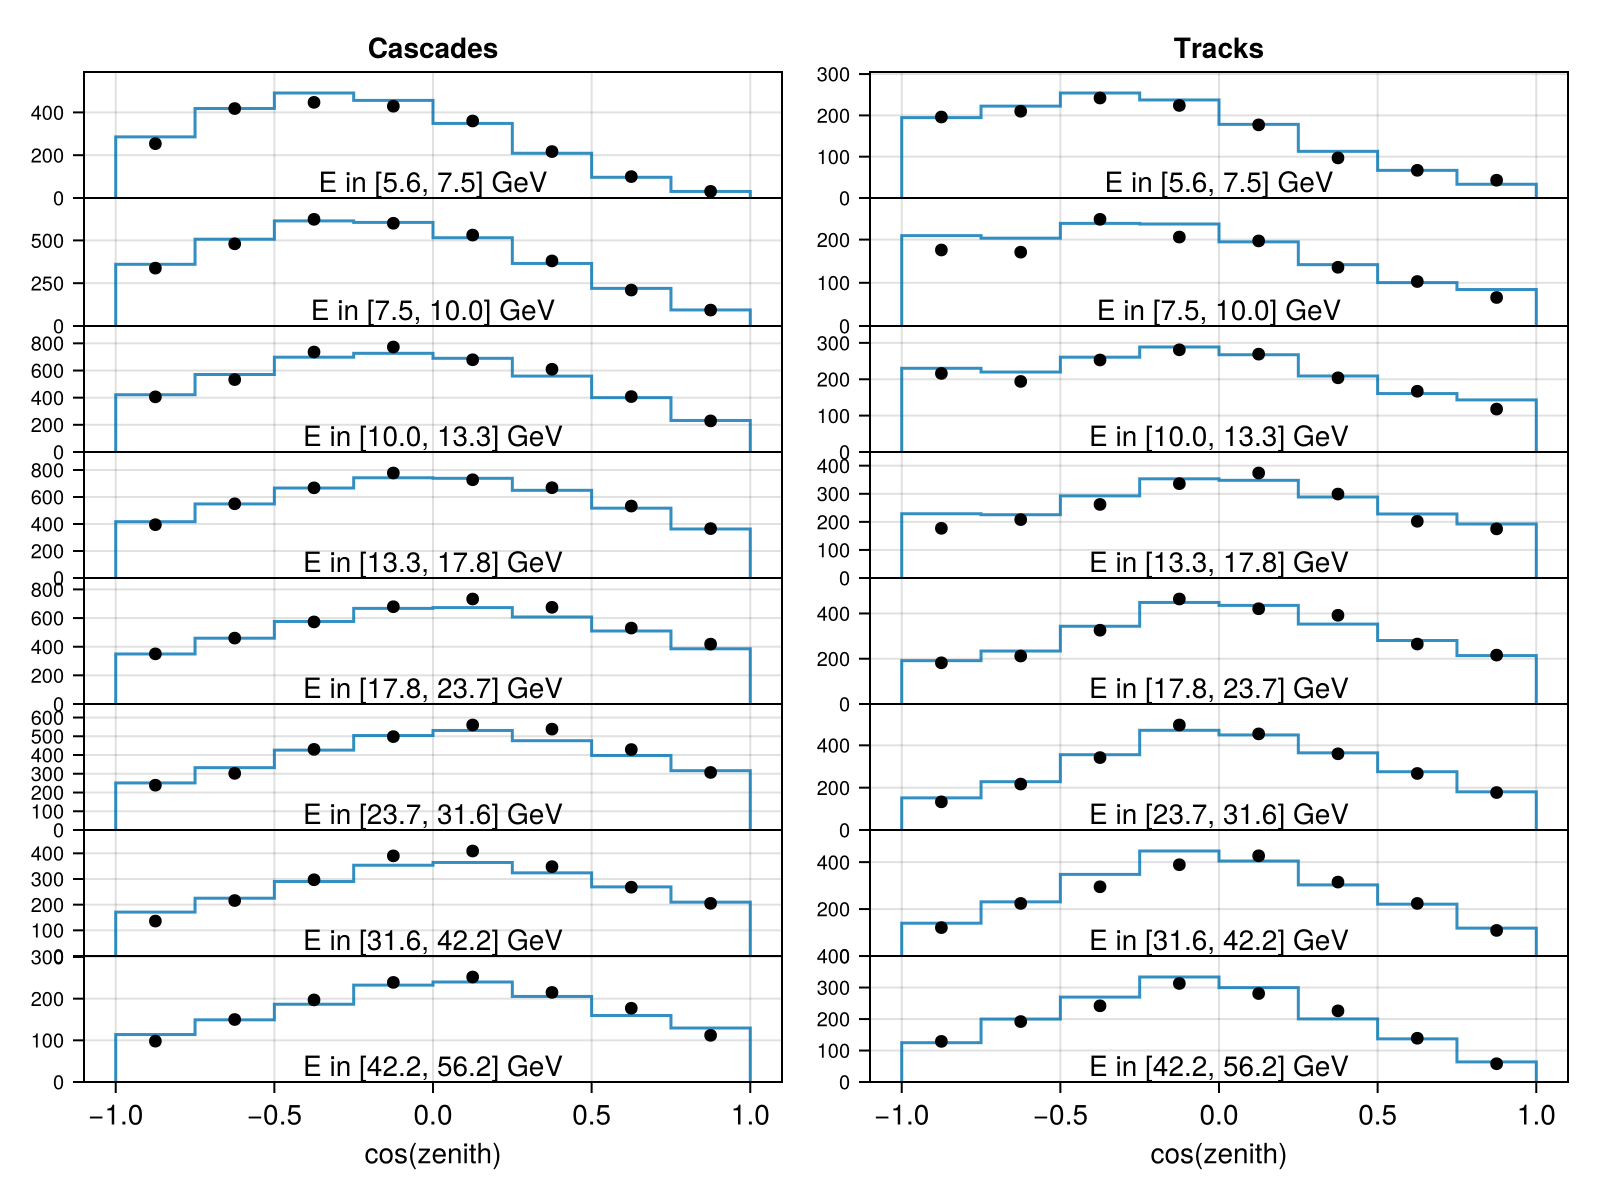

In [11]:
img = experiments.deepcore.plot(p)
display("image/png", img)
save("/home/sofialon/Newtrinos.jl/natural plot/deepcore/deepcore_data_NND.png", img)

In [13]:

all_priors = Newtrinos.get_priors(experiments)


vars_to_scan = (θ₂₃=31, Δm²₃₁=31)

modified_priors = (
   # N =all_priors.N, 
    #m₀= all_priors.m₀,
    #r = all_priors.r,
    


    Δm²₂₁ = p.Δm²₂₁,  
    Δm²₃₁ =all_priors.Δm²₃₁ , 
    δCP = p.δCP,    
    θ₁₂ = p.θ₁₂,    
    θ₁₃= p.θ₁₃,       
    θ₂₃ = all_priors.θ₂₃
)


(Δm²₂₁ = 7.53e-5, Δm²₃₁ = Uniform{Float64}(a=0.002, b=0.003), δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = Uniform{Float64}(a=0.5235987755982988, b=1.0471975511965976))

In [ ]:
likelihood = Newtrinos.generate_likelihood(experiments);


In [ ]:
result = Newtrinos.scan(likelihood, modified_priors, vars_to_scan, p)
#result = Newtrinos.scan(likelihood, Newtrinos.get_priors(experiments), (r=31, N=31), p)

In [ ]:
using CairoMakie

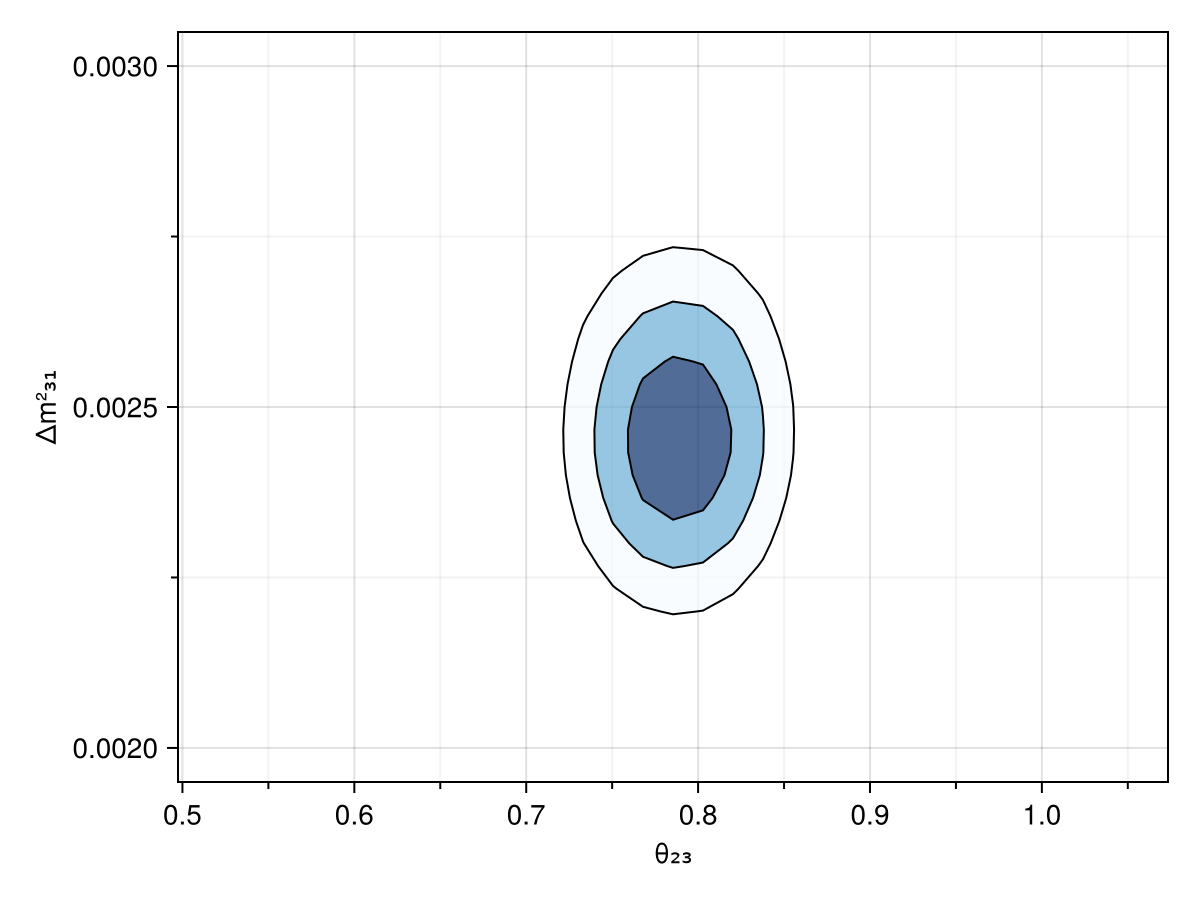

In [ ]:
img = CairoMakie.plot(result)
display("image/png", img)
save("/home/sofialon/Newtrinos.jl/natural plot/deepcore/deepcore_thetadelta_NND.png", img)


In [ ]:
L=experiments.deepcore.assets.paths
println("L = ", L)

L = Vector{Path}[Path[Path(20.100122271021974, 1), Path(673.7535819766746, 2), Path(2244.031468284953, 3), Path(2378.568580858474, 4), Path(2085.602784832241, 5), Path(2378.568580858474, 4), Path(2244.031468284953, 3), Path(671.7635819766746, 2)], Path[Path(20.30339868390365, 1), Path(681.3966588665074, 2), Path(2292.159706717164, 3), Path(2768.7443840562846, 4), Path(1066.3289477923754, 5), Path(2768.7443840562846, 4), Path(2292.159706717164, 3), Path(679.4266588665074, 2)], Path[Path(20.510820438365045, 1), Path(689.2268052997503, 2), Path(2343.31235446334, 3), Path(6358.472945802318, 4), Path(2343.31235446334, 3), Path(687.2768052997502, 2)], Path[Path(20.722515382969505, 1), Path(697.2513830864398, 2), Path(2397.869131446891, 3), Path(6105.931485768578, 4), Path(2397.869131446891, 3), Path(695.3213830864398, 2)], Path[Path(20.9386166672557, 1), Path(705.4781670811371, 2), Path(2456.288626270408, 3), Path(5845.260622427368, 4), Path(2456.288626270408, 3), Path(703.5681670811372, 2)]

In [41]:
# STANDARD MODEL
E_range = range(5, 50, length=1000) 
L=13000
L_vec = [L]

osc_cfg_SM = Newtrinos.osc.OscillationConfig(
    flavour=Newtrinos.osc.ThreeFlavour(),
    propagation=Newtrinos.osc.Basic(),
    states=Newtrinos.osc.All(),
    interaction=Newtrinos.osc.SI()
    )

osc_SM = Newtrinos.osc.configure(osc_cfg_SM)
 

atm_flux = Newtrinos.atm_flux.configure()
earth_layers = Newtrinos.earth_layers.configure()
xsec_SM = Newtrinos.xsec.configure()

physics_SM = (; osc=osc_SM, atm_flux, earth_layers, xsec=xsec_SM);


experiments_SM = (
 
   deepcore= Newtrinos.deepcore.configure(physics_SM),
);

p_SM = Newtrinos.get_params(experiments_SM)

osc_prob_SM = Newtrinos.osc.get_osc_prob(osc_cfg_SM)

probab_SM = osc_prob_SM(E_range, L_vec, p_SM; anti=false)

#probab_SM = osc_prob_SM(experiments_SM.deepcore.assets.binning.e_fine, experiments_SM.deepcore.assets.paths, experiments_SM.deepcore.assets.layers, p_SM; anti=false)

[ Info: Loading deepcore data


1000×1×3×3 Array{Float64, 4}:
[:, :, 1, 1] =
 0.8736388741757476
 0.8723532952989442
 0.8718554421251797
 0.8721314690571744
 0.8731523045528488
 0.8748760303954765
 0.8772502322464194
 0.8802142647245675
 0.8837013874761468
 0.887640740493387
 0.8919591372355588
 0.8965826629009063
 0.9014380725476117
 ⋮
 0.9558689228991273
 0.955930717496573
 0.9559924044142771
 0.9560539838000232
 0.9561154558020558
 0.956176820569071
 0.9562380782502087
 0.9562992289950434
 0.956360272953578
 0.9564212102762337
 0.9564820411138438
 0.9565427656176443

[:, :, 2, 1] =
 0.11179404403057523
 0.11563590069977946
 0.11846972409741
 0.1202876607984953
 0.12110431154711718
 0.12095365617120879
 0.11988595904466907
 0.11796474197157697
 0.1152638922902196
 0.11186495688255324
 0.10785465776372107
 0.10332265203699312
 0.098359548167964
 ⋮
 0.029720525815402264
 0.029677317054675415
 0.029634187049125803
 0.029591135678890455
 0.0295481628238388
 0.029505268363578523
 0.029462452177461376
 0.0294197141445888

In [42]:

# NNATURALNESS WITH DIFFERENT N 

osc_prob = Newtrinos.osc.get_osc_prob(osc_cfg)

p= Newtrinos.get_params(experiments)
p_5 = merge(p, (N = ftype(5),))
p_10 = merge(p, (N = ftype(10),))
p_20 = merge(p, (N = ftype(20),))
p_50 = merge(p, (N = ftype(50),))

probab_5 = osc_prob(collect(E_range), L_vec, p_5; anti=false)
probab_10 = osc_prob(collect(E_range), L_vec, p_10; anti=false)
probab_20 = osc_prob(collect(E_range), L_vec, p_20; anti=false)
probab_50 = osc_prob(collect(E_range), L_vec, p_50; anti=false)

p_0 = merge(p, (r = ftype(0),))
p_025 = merge(p,  (r = ftype(0.25),))
p_05 = merge(p,  (r = ftype(0.5),))
p_1 = merge(p,  (r = ftype(1),))


probab_0 = osc_prob(collect(E_range), L_vec, p_0; anti=false)
probab_025 = osc_prob(collect(E_range), L_vec, p_025; anti=false)
probab_05 = osc_prob(collect(E_range), L_vec, p_05; anti=false)
probab_1 = osc_prob(collect(E_range), L_vec, p_1; anti=false)


1000×1×60×60 Array{Float64, 4}:
[:, :, 1, 1] =
 0.8614765947079226
 0.8673367500394196
 0.8609504127777189
 0.85999455292426
 0.8658285225228898
 0.8653634675683016
 0.8651154939397852
 0.8676562398852611
 0.878449463613849
 0.8748135953436479
 0.8850287322044242
 0.8850435172680449
 0.889117543751122
 ⋮
 0.9549548640004917
 0.953978023053102
 0.9517345869174304
 0.949278032890511
 0.947629083978805
 0.9472437631360825
 0.9478694392460761
 0.9488428701527464
 0.949596757385288
 0.9500219655913383
 0.9504523299638956
 0.9513083250660596

[:, :, 2, 1] =
 0.11040064317738502
 0.11489616899866961
 0.11733578650545695
 0.11886190647332645
 0.11871182252524518
 0.11881385555684786
 0.11791644141942845
 0.11606071065412368
 0.11426568851226923
 0.10996546162571877
 0.10736220825888258
 0.10275109470818032
 0.09741599866268992
 ⋮
 0.029500612351098063
 0.029401772353609235
 0.029361120753609977
 0.029426033646878073
 0.029547738083371557
 0.02961130060806306
 0.029516069266733603
 0.0292511851

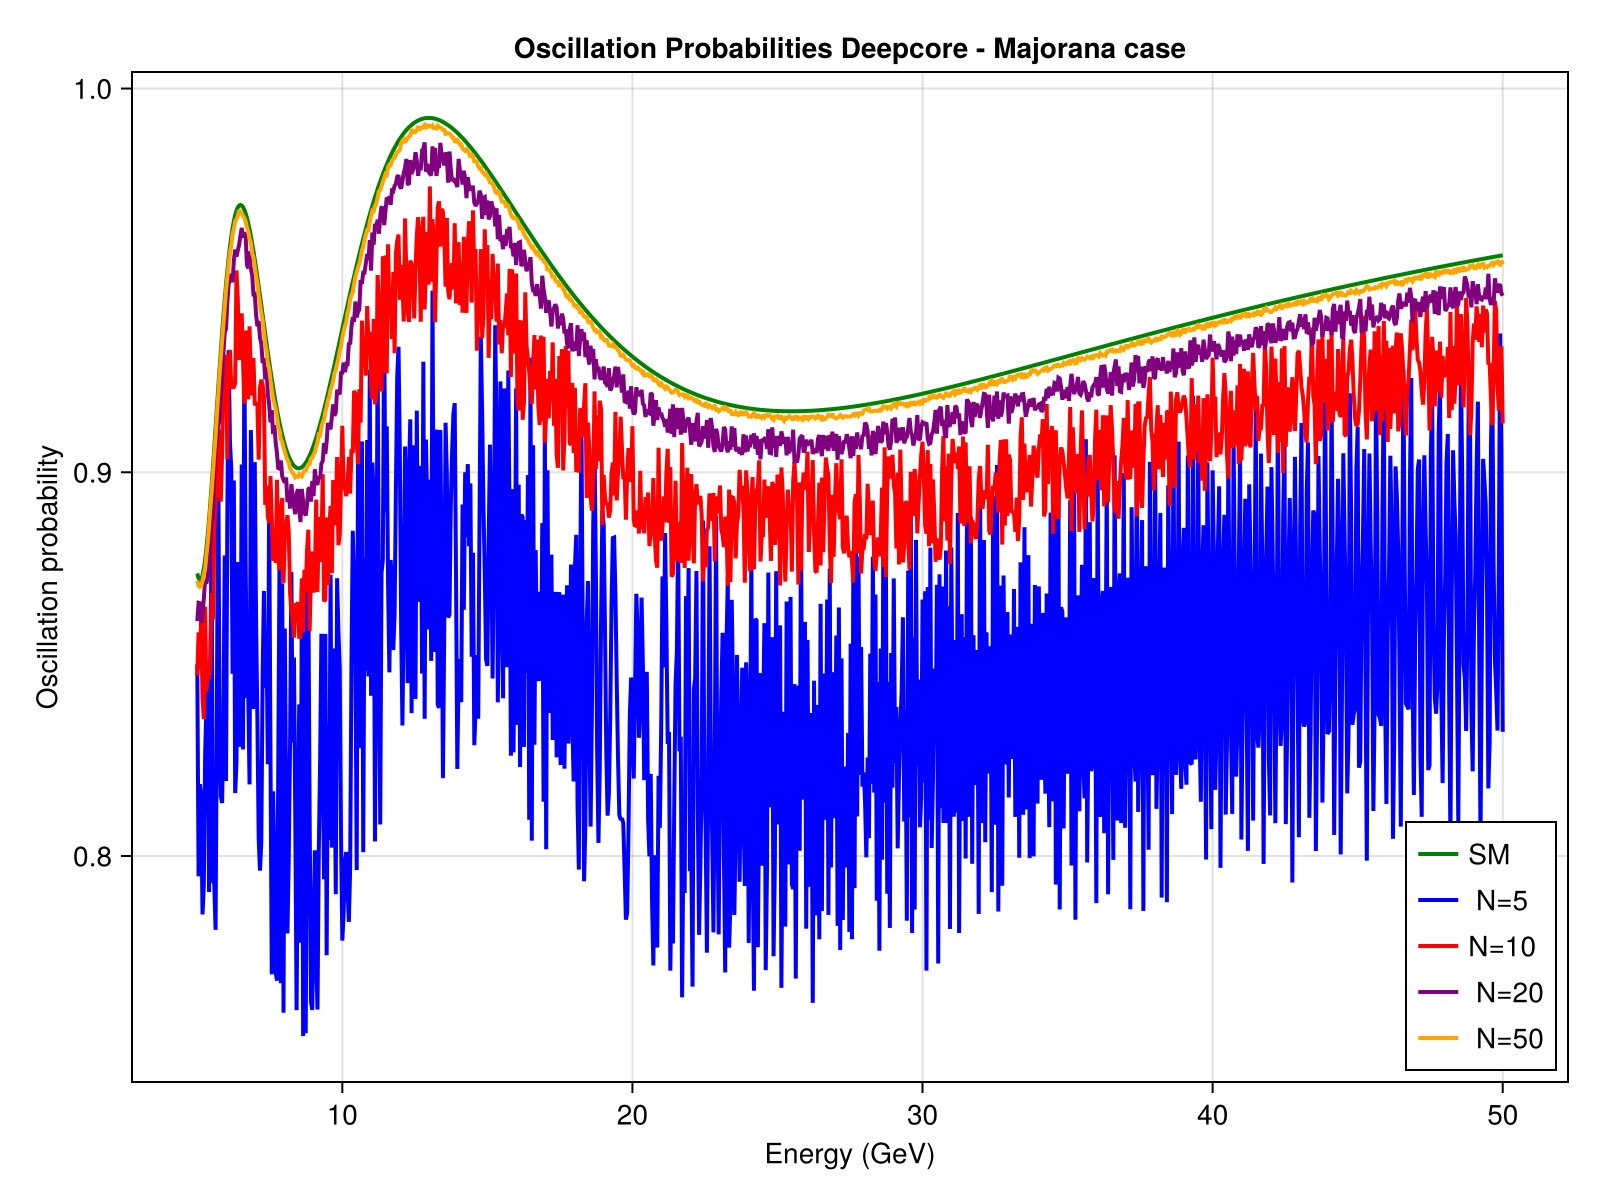

In [ ]:

fig = Figure(size=(800, 600))
ax = Axis(fig[1,1], 
    xlabel = "Energy (GeV)",
    ylabel = "Oscillation probability", 
    title = "Oscillation Probabilities Deepcore - Majorana case"
)

# Plot the lines
lines!(ax, E_range, probab_SM[:, 1, 1,1], label="SM", linewidth=2, color=:green)
lines!(ax, E_range, probab_5[:, 1, 1,1], label=" N=5", linewidth=2, color=:blue)
lines!(ax, E_range, probab_10[:, 1, 1,1], label="N=10", linewidth=2, color=:red)
lines!(ax, E_range, probab_20[:, 1,1,1], label=" N=20", linewidth=2, color=:purple)
lines!(ax, E_range, probab_50[:, 1,1,1], label=" N=50", linewidth=2, color=:orange)

# Add legend and set limits
axislegend(ax, position=:rb)
save("/home/sofialon/Newtrinos.jl/natural plot/deepcore/osc_deepcore_N_Majorana.png", fig)

fig

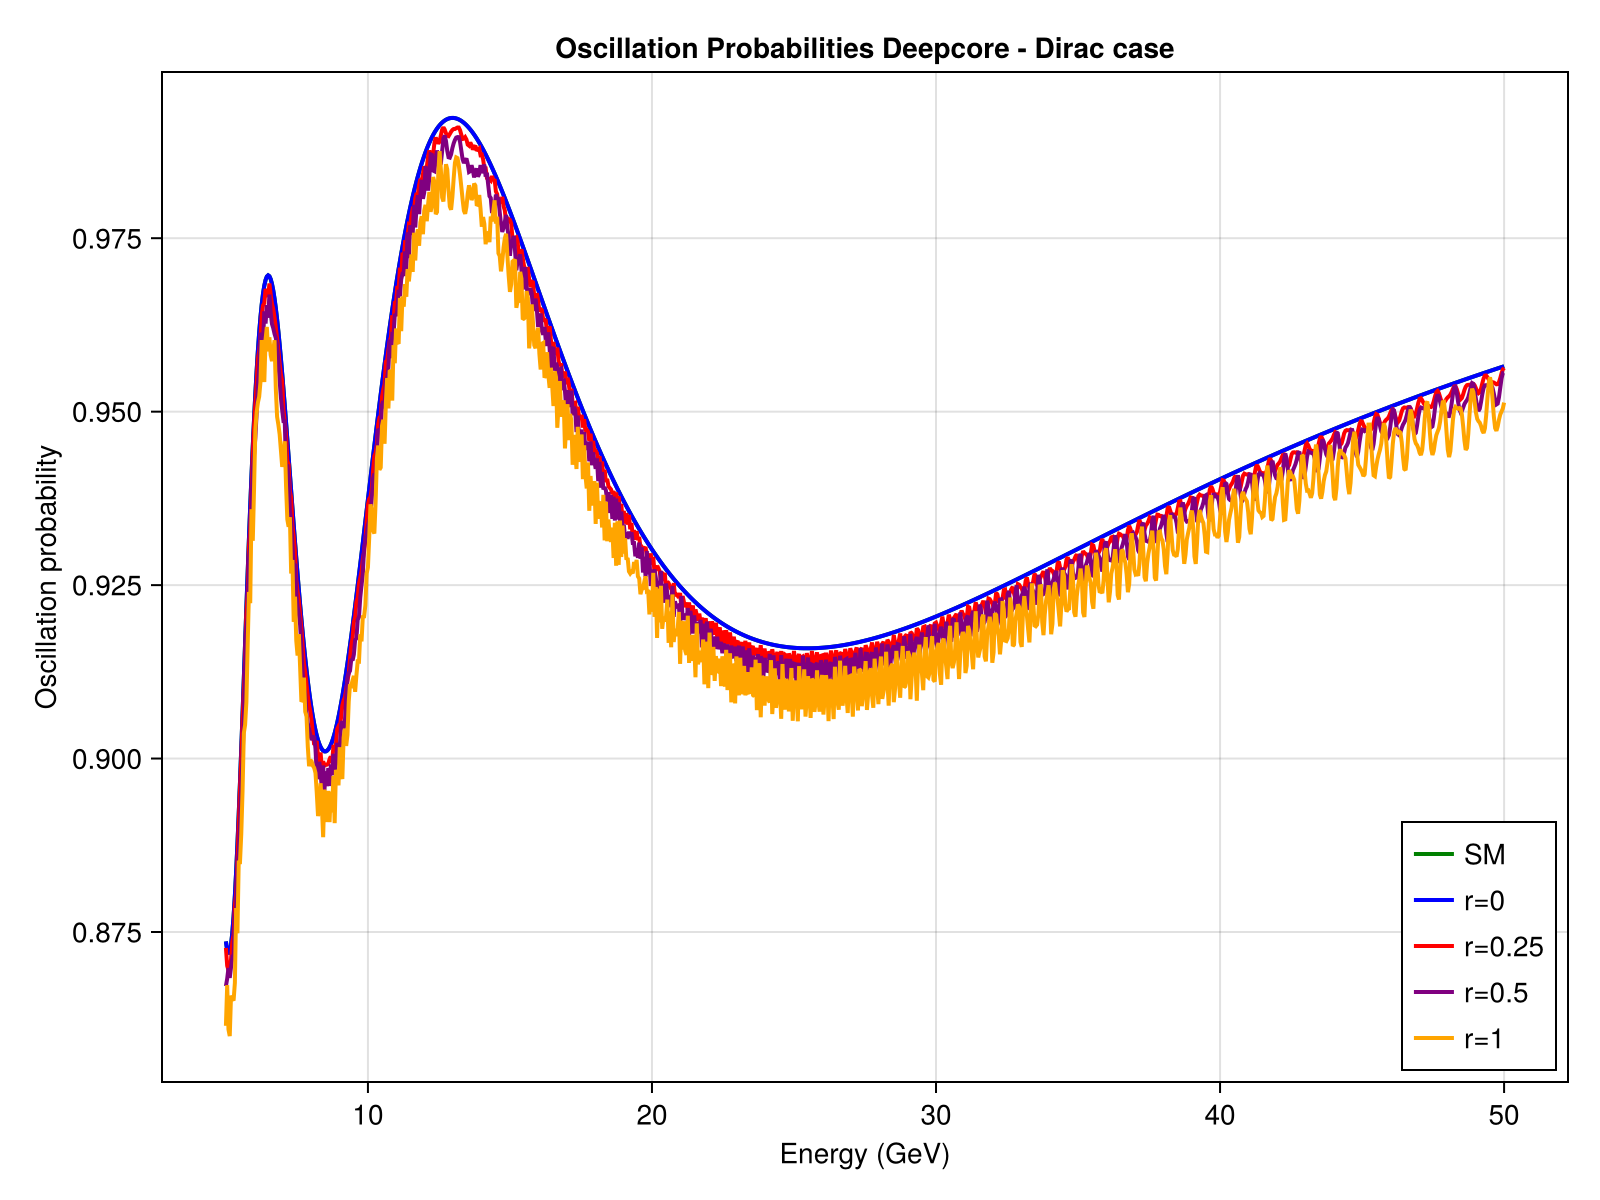

In [43]:

fig = Figure(size=(800, 600))
ax = Axis(fig[1,1], 
    xlabel = "Energy (GeV)",
    ylabel = "Oscillation probability", 
    title = "Oscillation Probabilities Deepcore - Dirac case"
)

# Plot the lines
lines!(ax, E_range, probab_SM[:, 1, 1,1], label="SM", linewidth=2, color=:green)
lines!(ax, E_range, probab_0[:, 1, 1,1], label="r=0", linewidth=2, color=:blue)
lines!(ax, E_range, probab_025[:, 1, 1,1], label="r=0.25", linewidth=2, color=:red)
lines!(ax, E_range, probab_05[:, 1,1,1], label="r=0.5", linewidth=2, color=:purple)
lines!(ax, E_range, probab_1[:, 1,1,1], label="r=1", linewidth=2, color=:orange)

# Add legend and set limits
axislegend(ax, position=:rb)
save("/home/sofialon/Newtrinos.jl/natural plot/deepcore/osc_deepcore_r_Dirac.png", fig)

fig